In [7]:
import numpy as np
import constants as const
import matplotlib.pyplot as plt

In [3]:
kb = 1.3807e-16

def I_nu(nu, ns, ne, nc, A, Tline, T, s):

    return ns * A * np.exp(-Tline / T) / ((1 + nc / ne) * 4 * np.pi * nu) * np.sqrt(16 * const.mp * const.c**2 / (kb * T)) * s

In [4]:
def B_nu(nu, T):

    return 2 * const.h * nu**3 / const.c**2 * 1 / (np.exp(const.h * nu / (kb * T)) - 1)

In [53]:
ne = 1e7
ns = 1e-3 * ne

OII = np.array([[834,5.78622E-4,172421.6,1.32174E15],
[2741,3.81198E-13,58225.3,4.48777E7],
[3727,4.29901E-16,38575.0,5.36461E3],
[7320,3.76929E-13,53063.6,3.11018E7]])

OIII = np.array([[520000,3.13852E-18,277.682,2.5493E3],
[5000,3.386678E-14,28728.6,9.66741E5],
[166,6.59979E-10,86632.4,1.475889E10],
[83.5,1.75205E3,172569.7,5.405937E21]])

CII = np.array([[1570000,1.78292054E-20,91.2,1.38779668E+01],
[2326,1.21471023E-10,61853.9,1.20977633e+09],
[1334,2.41304508E-03,107718.1,3.74008770E+15]])

CIII= np.array([[1910,3.84223024E-10,75460.8,1.31478953E+9],
[977,1.79050834E-03,147263.9,7.17164800E+14]])

OII[:, 0] = const.c / (OII[:, 0] * 1e-8)
OIII[:, 0] = const.c / (OIII[:, 0] * 1e-8)
CII[:, 0] = const.c / (CII[:, 0] * 1e-8)
CIII[:, 0] = const.c / (CIII[:, 0] * 1e-8)

a = 1.5e13 * 0.04
H = const.r_sun



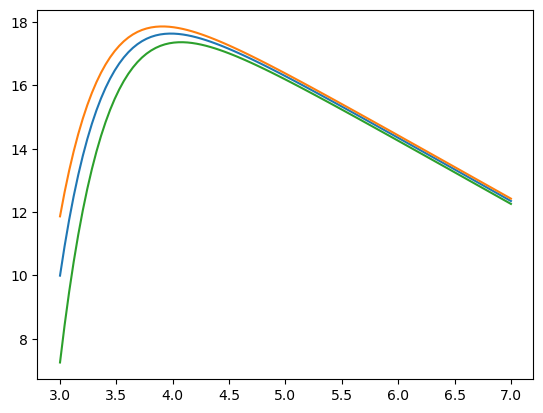

In [72]:
wav = np.logspace(-5, -1, 100)
w = const.c / wav

plt.plot(np.log10(wav * 1e8), np.log10(B_nu(w, 5300) * np.pi * const.r_sun**2), label = 'solar')
plt.plot(np.log10(wav * 1e8), np.log10(B_nu(w, 6300) * np.pi * const.r_sun**2), label = 'F')
plt.plot(np.log10(wav * 1e8), np.log10(B_nu(w, 4300) * np.pi * const.r_sun**2), label = 'K')

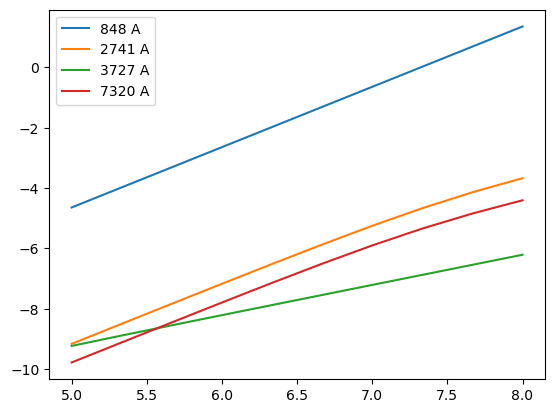

In [95]:
ne = np.tile(np.logspace(5,8,10), (4, 1))
ns = 1e-3 * ne

OII_emission = I_nu(np.reshape(OII[:, 0], (4, 1)), ns, ne, np.reshape(OII[:, 3], (4,1)), np.reshape(OII[:, 1], (4,1)), np.reshape(OII[:, 2], (4, 1)), 10**4, 1e11) * H * a
solar_OIIemission = B_nu(OII[:, 0], 5300) * np.pi * const.r_sun**2

plt.plot(np.log10(ne[0]), np.log10(OII_emission[0, :] / solar_OIIemission[0]), label = '848 A')
plt.plot(np.log10(ne[1]), np.log10(OII_emission[1, :] / solar_OIIemission[1]), label = '2741 A')
plt.plot(np.log10(ne[2]), np.log10(OII_emission[2, :] / solar_OIIemission[2]), label = '3727 A')
plt.plot(np.log10(ne[3]), np.log10(OII_emission[3, :] / solar_OIIemission[3]), label = '7320 A')
plt.legend()


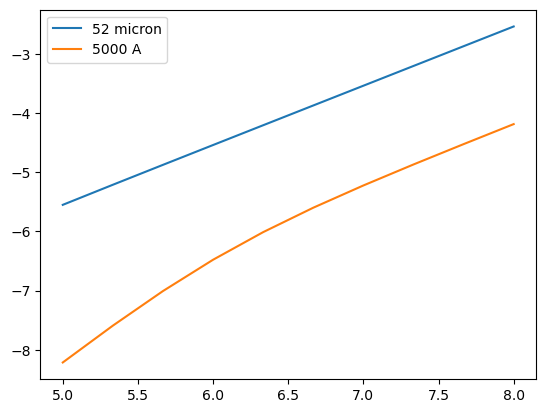

In [105]:
ne = np.tile(np.logspace(5,8,10), (4, 1))
ns = 1e-3 * ne

OIII_emission = I_nu(np.reshape(OIII[:, 0], (4, 1)), ns, ne, np.reshape(OIII[:, 3], (4,1)), np.reshape(OIII[:, 1], (4,1)), np.reshape(OIII[:, 2], (4, 1)), 10**4, 1e11) * H * a
solar_OIIIemission = B_nu(OIII[:, 0], 5300) * np.pi * const.r_sun**2

plt.plot(np.log10(ne[0]), np.log10(OIII_emission[0, :] / solar_OIIIemission[0]), label = '52 micron')
plt.plot(np.log10(ne[1]), np.log10(OIII_emission[1, :] / solar_OIIIemission[1]), label = '5000 A')
#plt.plot(np.log10(ne[2]), np.log10(OIII_emission[2, :] / solar_OIIIemission[2]), label = '166 A')
#plt.plot(np.log10(ne[3]), np.log10(OIII_emission[3, :] / solar_OIIIemission[3]), label = '83.5 A')
plt.legend()

Text(0.5, 0, 'number density electrons')

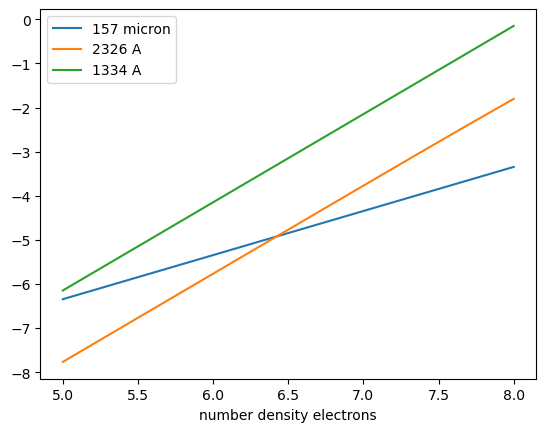

In [99]:
ne = np.tile(np.logspace(5,8,10), (3, 1))
ns = 1e-3 * ne

CII_emission = I_nu(np.reshape(CII[:, 0], (3, 1)), ns, ne, np.reshape(CII[:, 3], (3,1)), np.reshape(CII[:, 1], (3,1)), np.reshape(CII[:, 2], (3, 1)), 10**4, 1e11) * H * a
solar_CIIemission = B_nu(CII[:, 0], 5300) * np.pi * const.r_sun**2

plt.plot(np.log10(ne[0]), np.log10(CII_emission[0, :] / solar_CIIemission[0]), label = '157 micron')
plt.plot(np.log10(ne[1]), np.log10(CII_emission[1, :] / solar_CIIemission[1]), label = '2326 A')
plt.plot(np.log10(ne[2]), np.log10(CII_emission[2, :] / solar_CIIemission[2]), label = '1334 A')
plt.legend()
plt.xlabel('number density electrons')

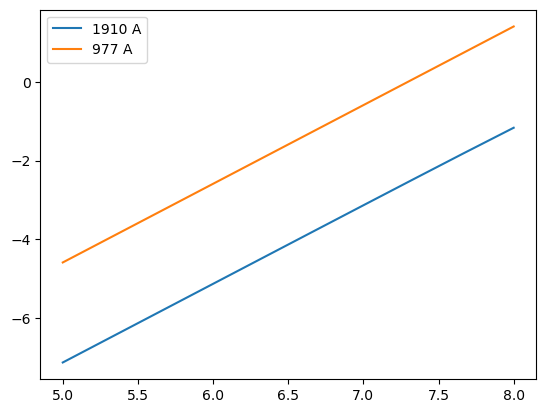

In [98]:
ne = np.tile(np.logspace(5,8,10), (2, 1))
ns = 1e-3 * ne

CIII_emission = I_nu(np.reshape(CIII[:, 0], (2, 1)), ns, ne, np.reshape(CIII[:, 3], (2,1)), np.reshape(CIII[:, 1], (2,1)), np.reshape(CIII[:, 2], (2, 1)), 10**4, 1e11) * H * a
solar_CIIIemission = B_nu(CIII[:, 0], 5300) * np.pi * const.r_sun**2

plt.plot(np.log10(ne[0]), np.log10(CIII_emission[0, :] / solar_CIIIemission[0]), label = '1910 A')
plt.plot(np.log10(ne[1]), np.log10(CIII_emission[1, :] / solar_CIIIemission[1]), label = '977 A')
plt.legend()

In [ ]:
I_nu(OII[:, 0], ns, ne, OII[:, 3], OII[:, 1], OII[:, 2], 10**4, 1e11)

In [142]:
I_nu(OIII[:, 0], ns, ne, OIII[:, 3], OIII[:, 1], OIII[:, 2], 0.5 * 10**4, 1e11)

array([7.64138515e-11, 2.44346168e-11, 1.09690595e-16, 1.37347892e-23])

In [143]:
I_nu(CII[:, 0], ns, ne, CII[:, 3], CII[:, 1], CII[:, 2], 0.5 * 10**4, 1e11)

array([1.36076523e-12, 4.86311350e-13, 1.87602184e-16])

In [144]:
I_nu(CIII[:, 0], ns, ne, CIII[:, 3], CIII[:, 1], CIII[:, 2], 10**4, 1e11)

array([1.02425398e-10, 3.43416158e-13])

In [34]:
B_nu(OII[:, 0], 5300) * (H / a)

array([5.83719806e-16, 1.12374700e-07, 6.14418585e-07, 2.96573027e-06])

In [59]:
B_nu(OIII[:, 0], 5300) * (H / a)

array([6.14241774e-009, 1.63151450e-006, 9.67931190e-071, 5.15676225e-140])

In [139]:
B_nu(CII[:, 0], 5300) * (H / a)**2

array([5.11302338e-11, 2.34244231e-09, 2.11344059e-12])

In [136]:
B_nu(CIII[:, 0], 5300) * (H / a)**2

array([3.33029269e-10, 3.17337116e-15])

In [ ]:
#emission as a function of electron densi